## Extraction of BOSS Flux Data

This notebook extracts all the data that spframe_flux.py generates and displays it as a Pandas DataFrame so it is more easily plottable and modifiable. It also includes a cut in the data for all "GOOD" images as identified in platelist.fits.

In [1]:
%matplotlib inline
import os, sys, glob, csv
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.time import Time
from astropy.coordinates import EarthLocation

In [2]:
#Identify all txt files generated by spframe_flux.py in whatever folder you have them saved
DIR = '/global/homes/p/parkerf/BOSS_Sky/sky_flux/'
all_files = []
for filename in glob.iglob(DIR+'/**/*.txt', recursive=True):
    all_files.append(filename)

In [3]:
#Extracts all data from the text files
np_array_list = []
for filen in all_files:
    with open(filen,'r') as file:
        csvfile = csv.reader(file,delimiter=' ')
        next(csvfile, None) #skip header
        for row in csvfile:
            flux = row[11]
            wave = row[12]
            flux_array = pd.to_numeric(np.asarray(flux), errors='coerce')
            wave_array = pd.to_numeric(np.asarray(wave), errors='coerce')
            Plate,image,fiber,TAIbeg,TAIend,RA,DEC,Camera,Airmass,Alt,Exptime = row[0:11]
            listr = [Plate,image,fiber,TAIbeg,TAIend,RA,DEC,Camera,Airmass,Alt,Exptime,flux_array,wave_array]
            np_array_list.append(listr)

In [4]:
#Turn it into a Pandas dataframe for convenience
df = pd.DataFrame(np_array_list)
df.columns = ['PLATE','image','fiber','TAI_beg','TAI_end','RA','DEC','Camera','Airmass','Alt','Exptime','flux','wave']
df = df.apply(lambda x: pd.to_numeric(x,errors='ignore'))

In [5]:
def make_data_arrays(array):
    #Data formatting from txt file to workable numpy arrays
    array = np.array(str(array).split(','))
    ff = []
    for i in array:
        try: f = float(i)
        except: f = 0
        ff.append(f)
    return np.array(ff)

In [6]:
df.flux = df.flux.apply(make_data_arrays)
df.wave = df.wave.apply(make_data_arrays)

In [7]:
df.head()

,PLATE,image,fiber,TAI_beg,TAI_end,RA,DEC,Camera,Airmass,Alt,Exptime,flux,wave
0,7409,519,180404,4.908314e+09,4.908315e+09,200.42,47.89,b2,1.06,72.27,900.16,"[0.42, 0.77, 0.16, -0.14, 0.68, 0.2, 0.11, 0.9...","[365.03, 365.13, 365.23, 365.33, 365.43, 365.5..."
1,7409,529,180404,4.908314e+09,4.908315e+09,200.42,47.89,b2,1.06,72.27,900.16,"[0.71, 1.12, 0.06, -0.16, 0.88, 0.25, 0.68, 0....","[365.05, 365.15, 365.25, 365.35, 365.45, 365.5..."
2,7409,543,180404,4.908314e+09,4.908315e+09,200.42,47.89,b2,1.06,72.27,900.16,"[0.89, 1.42, 0.51, 0.3, 0.25, 0.09, 0.61, 0.18...","[365.0, 365.1, 365.2, 365.3, 365.4, 365.5, 365..."
3,7409,547,180404,4.908314e+09,4.908315e+09,200.42,47.89,b2,1.06,72.27,900.16,"[1.05, 0.2, 0.24, 0.04, 0.65, 0.19, -0.04, 0.1...","[365.03, 365.13, 365.23, 365.33, 365.43, 365.5..."
4,7409,575,180404,4.908314e+09,4.908315e+09,200.42,47.89,b2,1.06,72.27,900.16,"[0.56, 0.23, 0.17, 0.29, 0.7, 0.21, -0.1, 0.31...","[365.04, 365.14, 365.24, 365.33, 365.43, 365.5..."


In [8]:
#Turn pd.series into np.arrays
fluxes = np.array(df.flux)
waves = np.array(df.wave)

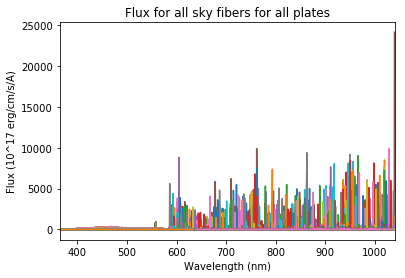

In [9]:
for i, flux in enumerate(fluxes):
    plt.plot(waves[i],flux)
plt.xlim([365,1040])
plt.xlabel('Wavelength (nm)')
plt.ylabel('Flux (10^17 erg/cm/s/A)')
plt.title("Flux for all sky fibers for all plates")

In [11]:
plate_df = df[df.PLATE == 7409]
plate_fluxes = np.array(plate_df.flux)
plate_waves = np.array(plate_df.wave)

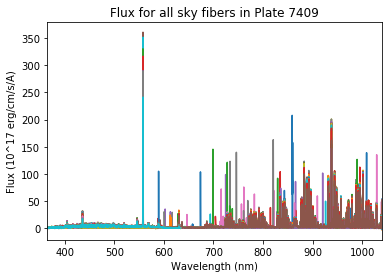

In [12]:
for i,f in enumerate(plate_fluxes):
    plt.plot(plate_waves[i],f)
plt.xlim([365,1040])
plt.xlabel('Wavelength (nm)')
plt.ylabel('Flux (10^17 erg/cm/s/A)')
plt.title("Flux for all sky fibers in Plate 7409")

### Look at missing files

In [13]:
no_spc_match = pickle.load(open('no_spc_match.pkl','rb'))

In [14]:
new_array = []
for item in np.array(no_spc_match):
    if len(item)==0:
        pass
    else:
        new_array.append(item)

In [15]:
no_spc_dict = {}
for plate in new_array:
    images = []
    for image in plate:
        p = image[1]
        i = image[0]
        images.append(i)
    no_spc_dict[p] = images        

In [16]:
no_spc_dict

{'7382': ['r2-00178848',
  'b1-00178848',
  'b2-00178848',
  'r1-00178848',
  'b1-00178849',
  'b2-00178849',
  'r1-00178849',
  'r2-00178849',
  'b2-00178850',
  'r1-00178850',
  'r2-00178850',
  'b1-00178850',
  'b2-00178851',
  'r2-00178851',
  'r1-00178851',
  'b1-00178851'],
 '7398': ['r2-00179205',
  'b1-00179205',
  'r1-00179205',
  'b2-00179205',
  'r1-00179206',
  'r2-00179206',
  'b2-00179206',
  'b1-00179206',
  'r1-00179207',
  'b2-00179207',
  'r2-00179207',
  'b1-00179207'],
 '7411': ['b1-00178975',
  'b2-00178975',
  'r2-00178975',
  'r1-00178975',
  'r2-00178978',
  'b2-00178978',
  'b1-00178978',
  'r1-00178978',
  'r1-00178979',
  'r2-00178979',
  'b2-00178979',
  'b1-00178979'],
 '7413': ['r2-00178770', 'b1-00178770', 'r1-00178770', 'b2-00178770'],
 '7419': ['b1-00180535', 'b2-00180535', 'r1-00180535', 'r2-00180535'],
 '7422': ['b1-00179916',
  'r1-00179916',
  'b2-00179916',
  'r2-00179916',
  'b1-00179917',
  'r2-00179917',
  'b2-00179917',
  'r1-00179917',
  'b1-0

### Identify all "GOOD" data

platelist.fits identifies days that were "good" or "bad" and also the plates that were used on that day, which I refer to as a Plate-day. This quality data from platelist.fits is saved in good_plates.txt, which is the repo.

In [17]:
#This txt file contains all the good plate-days
GOOD_FILE = '/global/homes/p/parkerf/BOSS_Sky/good_plates.txt' 

In [18]:
#Pull info from this file and only use critical info
good_data = pd.DataFrame.from_csv(GOOD_FILE, index_col=None, header=0)
good_info = good_data[['MJD','QUALITY','PLATE']]

In [19]:
#Need to calculate the MJD of each observation to compare with the plate-day

#location and time
APACHE = EarthLocation(lat=(32+4.6/60+49.30/3600), lon=(-105+49./60+13.50/3600.), height=2788)
def mjd_time(fits_time):
    fits_time = float(fits_time)
    tt = Time(fits_time/86400, scale='tai', format='mjd', location=APACHE)
    return tt.mjd

In [20]:
df['TAI_MJD'] = df.TAI_beg.apply(mjd_time)
df['MJD'] = np.round(df.TAI_MJD)

In [ ]:
good_obs = pd.merge(df,good_info,on=['MJD','PLATE'],how='left')
good_df = good_obs[good_obs.QUALITY == 'good']